In [1]:
from pymc3 import *
from arviz import summary, plot_trace
import pickle, gzip
import numpy as np
import theano.tensor as tt

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def run_ttl_MCMC_WFprior(n, seg_sites, pop_size, lower, upper, draws=50000, progressbar=True):
    """
    Define and run MCMC to estimate mutation length with WF prior on total tree length

    """
    params = np.arange(2, n + 1) * np.arange(1, n) / 2

    with Model() as combined_model:
        brlens = Exponential('brlens', params, shape=n - 1)
        ttl = pop_size * tt.sum(tt.dot(brlens, np.arange(2, n + 1)))
        mut_rate = Uniform('mut_rate', lower=0, upper=1e-2)
        mu = ttl * mut_rate
        seg_sites_obs = Poisson('seg_sites_obs', mu=mu, observed=seg_sites)

    with combined_model:
        tune = int(draws / 5)
        trace = sample(draws, tune=tune, progressbar=progressbar)
    return combined_model, trace

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mut_rate, brlens]


Sampling 2 chains for 10_000 tune and 50_000 draw iterations (20_000 + 100_000 draws total) took 148 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


               mean       sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
brlens[0]   0.83116  0.85612  0.00001  2.37966    0.00318  0.00227   
brlens[1]   0.29972  0.30223  0.00000  0.84884    0.00100  0.00072   
brlens[2]   0.15527  0.15717  0.00000  0.43935    0.00050  0.00036   
brlens[3]   0.09477  0.09479  0.00000  0.26695    0.00030  0.00022   
brlens[4]   0.06389  0.06381  0.00000  0.17936    0.00019  0.00014   
brlens[5]   0.04594  0.04610  0.00000  0.12983    0.00014  0.00011   
brlens[6]   0.03469  0.03469  0.00000  0.09710    0.00011  0.00008   
brlens[7]   0.02699  0.02681  0.00000  0.07556    0.00008  0.00006   
brlens[8]   0.02169  0.02176  0.00000  0.06108    0.00006  0.00005   
brlens[9]   0.01780  0.01772  0.00000  0.04980    0.00005  0.00004   
brlens[10]  0.01483  0.01488  0.00000  0.04175    0.00004  0.00003   
brlens[11]  0.01261  0.01258  0.00000  0.03550    0.00004  0.00003   
brlens[12]  0.01081  0.01085  0.00000  0.03038    0.00003  0.00002   
brlens[13]  0.00939 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


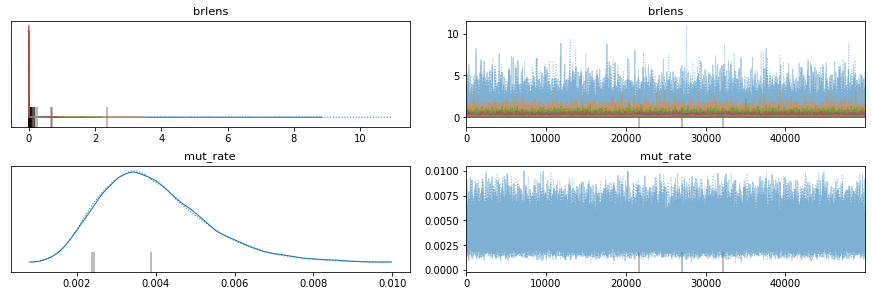

In [3]:
pop_size = 600
draws= 50000
n = 55
seg_sites = 18

mcmc_model, trace = run_ttl_MCMC_WFprior(n, seg_sites, pop_size, 0, 1e-2, draws=draws)
vars_brlens = [t['brlens'] for t in trace]
print(summary(trace, round_to=5))
plot_trace(trace)
plt.show()

In [11]:
n = 55
br_means = np.mean(vars_brlens, axis = 0)

print(600 * sum(br_means))
print(600 * sum(br_means * np.arange(2, n + 1)))
mean_mut_rate = np.mean([t['mut_rate'] for t in trace])
print(mean_mut_rate)
sd_mut_rate = np.std([t['mut_rate'] for t in trace])
print(sd_mut_rate)

1041.951114369936
5138.9508465045255
0.0039399235919852895
0.0013547697296061938
